# predicting the property evaluation value based on the quantitative and qualitative features for property tax assessment 

### Importing needed Libraries

In [1]:
import pandas as pd 
import numpy as np                     
import seaborn as sns               
import matplotlib.pyplot as plt     
%matplotlib inline 
import warnings                         
warnings.filterwarnings("ignore")


### Importing data and understanding it


In [2]:
#reading the traindata
data=pd.read_excel("Train.xlsx")

In [3]:
data_original=data.copy()

In [4]:
#checking the shape of the data
data.shape

(16810, 19)

In [5]:
data.head()

,PropertyID,Borough,State,Surroundings,Address,ZipCode,Block,Lot,BldgClassCategory,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,DateOfEvaluation,PropertyEvaluationvalue
0,PR11101,1,NY,BATHGATE,1473 CROTONA PLACE,10456,2927,127,02 TWO FAMILY DWELLINGS,2,0,2,1900,2394,1990,1,B1,2014-05-30,540000
1,PR11102,1,NY,BATHGATE,453 EAST 181,10457,3037,110,03 THREE FAMILY DWELLINGS,3,0,3,1687,3037,2002,1,C0,2014-09-13,750000
2,PR11103,1,NY,BATHGATE,511 EAST 171 STREET,10457,2912,155,02 TWO FAMILY DWELLINGS,2,0,2,2000,2400,1989,1,B1,2014-09-28,470000
3,PR11104,1,NY,BATHGATE,547 CLAREMONT PARKWAY,10457,2929,134,02 TWO FAMILY DWELLINGS,2,0,2,2356,2394,1991,1,B1,2014-06-05,570000
4,PR11105,1,NY,BATHGATE,2063 WASHINGTON AVENUE,10457,3036,140,02 TWO FAMILY DWELLINGS,2,0,2,3346,2308,1993,1,B1,2015-02-07,640000


###### Checking whether there are records with 0 price, which needs to be removed since it is a target variable

In [6]:
data[data.PropertyEvaluationvalue==0]

,PropertyID,Borough,State,Surroundings,Address,ZipCode,Block,Lot,BldgClassCategory,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,DateOfEvaluation,PropertyEvaluationvalue


In [7]:
data_original.head()

,PropertyID,Borough,State,Surroundings,Address,ZipCode,Block,Lot,BldgClassCategory,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,DateOfEvaluation,PropertyEvaluationvalue
0,PR11101,1,NY,BATHGATE,1473 CROTONA PLACE,10456,2927,127,02 TWO FAMILY DWELLINGS,2,0,2,1900,2394,1990,1,B1,2014-05-30,540000
1,PR11102,1,NY,BATHGATE,453 EAST 181,10457,3037,110,03 THREE FAMILY DWELLINGS,3,0,3,1687,3037,2002,1,C0,2014-09-13,750000
2,PR11103,1,NY,BATHGATE,511 EAST 171 STREET,10457,2912,155,02 TWO FAMILY DWELLINGS,2,0,2,2000,2400,1989,1,B1,2014-09-28,470000
3,PR11104,1,NY,BATHGATE,547 CLAREMONT PARKWAY,10457,2929,134,02 TWO FAMILY DWELLINGS,2,0,2,2356,2394,1991,1,B1,2014-06-05,570000
4,PR11105,1,NY,BATHGATE,2063 WASHINGTON AVENUE,10457,3036,140,02 TWO FAMILY DWELLINGS,2,0,2,3346,2308,1993,1,B1,2015-02-07,640000


# Bar plot between property evaluation and borough

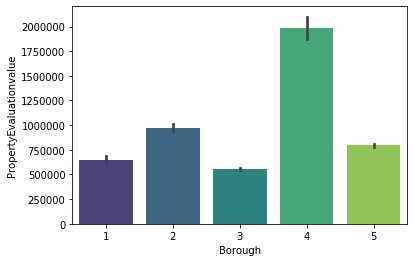

In [8]:
sns.barplot(x='Borough',y='PropertyEvaluationvalue',data=data,palette='viridis')

# correlation heatmap for data

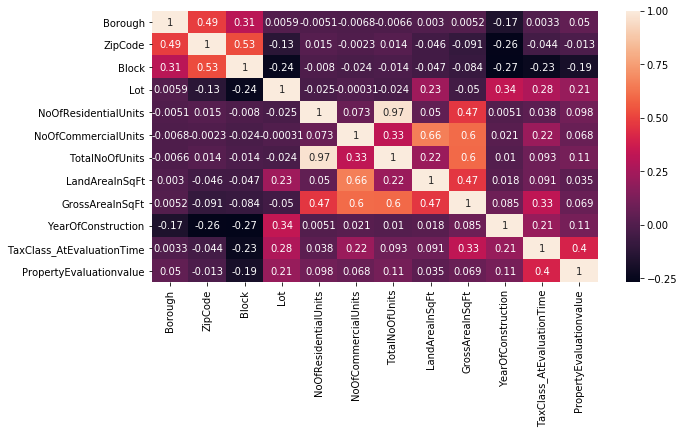

In [9]:
plt.figure(figsize=(10,5))
sns.heatmap(data_original.corr(),annot=True,)

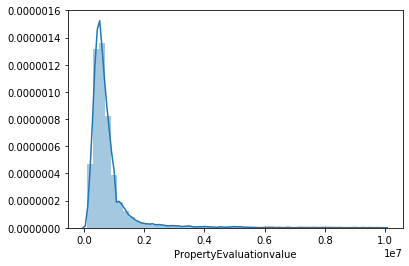

In [10]:
sns.distplot(data_original['PropertyEvaluationvalue'])


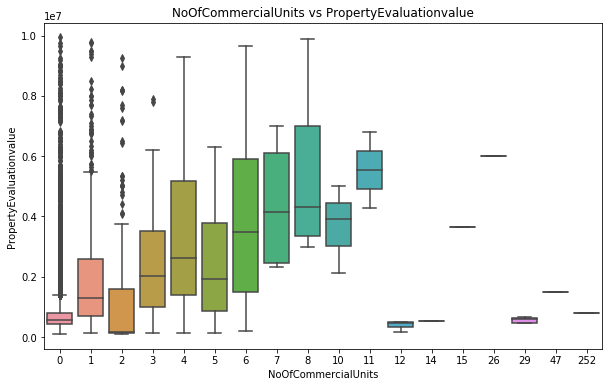

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(x='NoOfCommercialUnits', y='PropertyEvaluationvalue', data=data_original)
plt.title('NoOfCommercialUnits vs PropertyEvaluationvalue')
plt.show()


In [12]:
#checking the datatype, unique_values and levels in the data
def inspect_data(data):
    return pd.DataFrame({"Data Type":data.dtypes,"No of Unique Data":data.apply(lambda x: x.nunique(),axis=0), 
                         "Levels":data.apply(lambda x: str(x.unique()),axis=0)})
inspect_data(data)


,Data Type,No of Unique Data,Levels
PropertyID,object,16810,['PR11101' 'PR11102' 'PR11103' ... 'PR27908' '...
Borough,int64,5,[1 3 2 5 4]
State,object,1,['NY']
Surroundings,object,243,['BATHGATE' 'EAST TREMONT' 'FORDHAM' 'MOUNT HO...
Address,object,15219,['1473 CROTONA PLACE' '453 EAST 181' '511 EAST...
ZipCode,int64,174,[10456 10457 10458 10460 10453 10452 10306 103...
Block,int64,6405,[2927 3037 2912 ... 1496 1576 2065]
Lot,int64,1299,[127 110 155 ... 1171 1528 2249]
BldgClassCategory,object,52,['02 TWO FAMILY DWELLINGS' '03 THREE FAMILY DW...
NoOfResidentialUnits,int64,70,[2 3 4 1 0 70 38 74 16 8 18 20 6 14 5 7 71 37 ...


In [13]:
data.describe()

,Borough,ZipCode,Block,Lot,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,PropertyEvaluationvalue
count,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,1.681000e+04,1.681000e+04,16810.000000,16810.000000,1.681000e+04
mean,3.439143,10871.027543,5428.122308,266.327722,1.862225,0.137775,2.000000,1.092492e+04,3.612157e+03,1973.982867,1.289530,8.084101e+05
std,1.398950,522.996869,3710.031921,542.420132,8.027805,2.185857,8.472771,5.837620e+04,1.627378e+04,23.632595,0.713779,8.978317e+05
min,1.000000,10001.000000,6.000000,1.000000,0.000000,0.000000,1.000000,1.000000e+00,1.000000e+00,1941.000000,1.000000,1.000440e+05
25%,2.000000,10312.000000,2401.250000,25.000000,1.000000,0.000000,1.000000,2.100000e+03,1.224000e+03,1951.000000,1.000000,4.250000e+05
50%,3.000000,11207.000000,5050.000000,52.000000,1.000000,0.000000,1.000000,3.200000e+03,1.750000e+03,1968.000000,1.000000,5.900000e+05
75%,5.000000,11364.000000,7376.750000,138.000000,2.000000,0.000000,2.000000,5.000000e+03,2.449750e+03,1998.000000,1.000000,8.450000e+05
max,5.000000,11694.000000,16314.000000,5323.000000,437.000000,252.000000,437.000000,5.612000e+06,1.172005e+06,2012.000000,4.000000,9.935000e+06


### from describe
    from the above description we came to know that there are know NA'S in the dataset 
     from Lot we came to know that there are lot of outliers
 

### Extracting city from Zipcode

In [14]:
from uszipcode import SearchEngine
search = SearchEngine() 
x=data['ZipCode'].apply(lambda x: search.by_zipcode(x))
data["city"] =x.apply(lambda y:y.major_city)

In [15]:
data.head()

,PropertyID,Borough,State,Surroundings,Address,ZipCode,Block,Lot,BldgClassCategory,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,DateOfEvaluation,PropertyEvaluationvalue,city
0,PR11101,1,NY,BATHGATE,1473 CROTONA PLACE,10456,2927,127,02 TWO FAMILY DWELLINGS,2,0,2,1900,2394,1990,1,B1,2014-05-30,540000,Bronx
1,PR11102,1,NY,BATHGATE,453 EAST 181,10457,3037,110,03 THREE FAMILY DWELLINGS,3,0,3,1687,3037,2002,1,C0,2014-09-13,750000,Bronx
2,PR11103,1,NY,BATHGATE,511 EAST 171 STREET,10457,2912,155,02 TWO FAMILY DWELLINGS,2,0,2,2000,2400,1989,1,B1,2014-09-28,470000,Bronx
3,PR11104,1,NY,BATHGATE,547 CLAREMONT PARKWAY,10457,2929,134,02 TWO FAMILY DWELLINGS,2,0,2,2356,2394,1991,1,B1,2014-06-05,570000,Bronx
4,PR11105,1,NY,BATHGATE,2063 WASHINGTON AVENUE,10457,3036,140,02 TWO FAMILY DWELLINGS,2,0,2,3346,2308,1993,1,B1,2015-02-07,640000,Bronx


### Droping the unwantted columns
    PropertyID=unique values
    ZipCode=from zipcode extracted city and then drop the zipcode
    state=state contains only one state
    surroundngs= 243 unique places so droping the surroundings
    address = unique values in the data
    Total no.of units= it can be explained with no of residential and no of commercial units
    year of construction we extract age of the property so we are droping the columns
    BldgClassCategory we are droping because we extracted the feature importances from bldgcclass_atevaluation
    

In [16]:
data.drop(["PropertyID","ZipCode","State","Surroundings","Address","TotalNoOfUnits","Block","Lot","NoOfCommercialUnits","BldgClassCategory"],axis=1,inplace=True)

In [17]:
data.shape

(16810, 10)

### Excrating Age from YearOfConstruction

In [18]:
data['YearOfConstruction']=pd.to_datetime(data['YearOfConstruction'],format='%Y')
now = pd.Timestamp('now')
data['Age']=(now - data['YearOfConstruction']).astype('<m8[Y]')

In [19]:
data.drop(["YearOfConstruction","DateOfEvaluation","city"],axis=1,inplace=True)

In [20]:
data.shape

(16810, 8)

In [21]:
data.head()

,Borough,NoOfResidentialUnits,LandAreaInSqFt,GrossAreaInSqFt,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,PropertyEvaluationvalue,Age
0,1,2,1900,2394,1,B1,540000,29.0
1,1,3,1687,3037,1,C0,750000,17.0
2,1,2,2000,2400,1,B1,470000,30.0
3,1,2,2356,2394,1,B1,570000,28.0
4,1,2,3346,2308,1,B1,640000,26.0


In [22]:
data.dtypes

Borough                         int64
NoOfResidentialUnits            int64
LandAreaInSqFt                  int64
GrossAreaInSqFt                 int64
TaxClass_AtEvaluationTime       int64
BldgClass_AtEvaluationTime     object
PropertyEvaluationvalue         int64
Age                           float64
dtype: object

In [23]:
data["BldgClass_AtEvaluationTime"].unique()

array(['B1', 'C0', 'S4', 'A5', 'C3', 'G4', 'B2', 'K1', 'D7', 'D1', 'M1',
       'A2', 'A1', 'A9', 'B9', 'R3', 'B3', 'A0', 'S1', 'K4', 'A3', 'R4',
       'E2', 'K5', 'S9', 'W8', 'A6', 'K2', 'C9', 'C1', 'R1', 'V0', 'F9',
       'A4', 'F4', 'F1', 'I9', 'E1', 'K9', 'S2', 'G9', 'C2', 'G2', 'RG',
       'S5', 'R2', 'S3', 'GU', 'O7', 'O8', 'C6', 'W2', 'GW', 'E4', 'O1',
       'G1', 'G5', 'O9', 'D6', 'P9', 'E3', 'O6', 'P5', 'O5', 'D3', 'F5',
       'G8', 'A7', 'H2', 'N2', 'P8', 'O2', 'E9', 'W9', 'K7', 'Q9', 'C7',
       'K6', 'W3', 'H4', 'RR', 'Z9', 'G3', 'I6', 'I5', 'F2', 'V1', 'RK',
       'E7', 'D4', 'D9', 'H9', 'R6', 'Z3', 'I7', 'RA', 'M3', 'M9', 'I1',
       'R8', 'RH'], dtype=object)

### from the Bldgclass_atEvaluation 
    https://www.propertyshark.com/mason/text/nyc_building_class.html
    from the aboue website we can segeregate the data into different features
    

In [24]:
data["BldgClass_AtEvaluationTime"]=data["BldgClass_AtEvaluationTime"].replace(["A0","B1","C0","A5","C3","B2","D7","D1","A2","A1","A9","B9","B3","A3","A6",
                                                                               "C9","C1","A4","C2","C6","D4","D9","C7","A7","D6","D3"],"family")
data["BldgClass_AtEvaluationTime"]=data["BldgClass_AtEvaluationTime"].replace(["G4","G9","G2","G3","G1","GW","G5","G8","E1","E2","E5","E4","E3","E9","E7","F1","F4","F9","F5","GU"],"factory")
data["BldgClass_AtEvaluationTime"]=data["BldgClass_AtEvaluationTime"].replace(["K1","K4","K5","K7","R3","R1","RG","R4",'R8','RH',"RA","RR","R2"],"Condominiums")
data["BldgClass_AtEvaluationTime"]=data["BldgClass_AtEvaluationTime"].replace([ 'K2', 'V0', 'K9', 'P9',  'P5', 'H2',  'P8', 'K6', 'H4', 'Z9',"Z2" 'F2', 'V1', 'RK', "H3",'H9', 'R6', 'Z3'],"Facilities")
data["BldgClass_AtEvaluationTime"]=data["BldgClass_AtEvaluationTime"].replace(['S4','S1', 'S9' ,'S2', 'S5', 'S3'],"Residence_Multiple_Use")
data["BldgClass_AtEvaluationTime"]=data["BldgClass_AtEvaluationTime"].replace(['M1','M3', 'M9','N2'],"Churches_Asylums ")
data["BldgClass_AtEvaluationTime"]=data["BldgClass_AtEvaluationTime"].replace(['O7', 'O8','O1','O9','O6', 'O5', 'O2'],"Office_Buildings")
data["BldgClass_AtEvaluationTime"]=data["BldgClass_AtEvaluationTime"].replace(['I1','I9', 'I6', 'I5', 'I7'],"Hospitals_And_Health")
data["BldgClass_AtEvaluationTime"]=data["BldgClass_AtEvaluationTime"].replace(['W8','W2', 'W9', 'W3','Q9'],"Educational_Structures")

In [25]:
data["BldgClass_AtEvaluationTime"].unique()

array(['family', 'Residence_Multiple_Use', 'factory', 'Condominiums',
       'Churches_Asylums ', 'Educational_Structures', 'Facilities',
       'Hospitals_And_Health', 'Office_Buildings', 'F2'], dtype=object)

## Data Type Conversion

In [26]:
cat_cols=['BldgClass_AtEvaluationTime','Borough']
num_cols=data.columns.difference(cat_cols)

In [27]:
data[cat_cols]=data[cat_cols].apply(lambda x:x.astype("category"))
data[num_cols]=data[num_cols].apply(lambda x:x.astype("float"))

In [28]:
data.dtypes

Borough                       category
NoOfResidentialUnits           float64
LandAreaInSqFt                 float64
GrossAreaInSqFt                float64
TaxClass_AtEvaluationTime      float64
BldgClass_AtEvaluationTime    category
PropertyEvaluationvalue        float64
Age                            float64
dtype: object

# Preprocessing on Test data



### Importing data and understanding it

In [29]:
data1=pd.read_excel("Test.xlsx")
data1_original=data1.copy()

In [30]:
data1_original.head(2)

,PropertyID,Borough,State,Surroundings,Address,ZipCode,Block,Lot,BldgClassCategory,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,DateOfEvaluation
0,PR51101,1,NY,BATHGATE,3860 3 AVENUE,10457,2929,117,02 TWO FAMILY HOMES,2,0,2,2498,2394,1995,1,B1,2013-06-24
1,PR51102,1,NY,BATHGATE,455 E. 179TH STREET,10457,3036,65,02 TWO FAMILY DWELLINGS,2,0,2,2033,2340,1994,1,B1,2014-08-28


In [31]:
data1.head()

,PropertyID,Borough,State,Surroundings,Address,ZipCode,Block,Lot,BldgClassCategory,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,DateOfEvaluation
0,PR51101,1,NY,BATHGATE,3860 3 AVENUE,10457,2929,117,02 TWO FAMILY HOMES,2,0,2,2498,2394,1995,1,B1,2013-06-24
1,PR51102,1,NY,BATHGATE,455 E. 179TH STREET,10457,3036,65,02 TWO FAMILY DWELLINGS,2,0,2,2033,2340,1994,1,B1,2014-08-28
2,PR51103,1,NY,BATHGATE,4415 3 AVENUE,10457,3048,51,14 RENTALS - 4-10 UNIT,4,1,5,2500,6000,1963,2,S4,2015-01-31
3,PR51104,1,NY,BATHGATE,407 EAST 174 STREET,10457,2899,34,30 WAREHOUSES,0,1,1,3439,3320,1951,4,E1,2015-03-12
4,PR51105,1,NY,EAST TREMONT,2175 CROTONA AVENUE,10457,3083,40,03 THREE FAMILY DWELLINGS,3,0,3,1348,2931,1997,1,C0,2014-06-07


## Extracting city from Zipcode

In [32]:
search = SearchEngine() 
x=data1['ZipCode'].apply(lambda x: search.by_zipcode(x))
data1["city"] =x.apply(lambda y:y.major_city)

### Excrating Age from YearOfConstruction

In [33]:
data1['YearOfConstruction']=pd.to_datetime(data1['YearOfConstruction'],format='%Y')
now = pd.Timestamp('now')
data1['Age']=(now - data1['YearOfConstruction']).astype('<m8[Y]')

### Droping the unwantted columns
    PropertyID=unique values
    ZipCode=from zipcode extracted city and then drop the zipcode
    state=state contains only one state
    surroundngs= 243 unique places so droping the surroundings
    address = unique values in the data
    Total no.of units= it can be explained with no of residential and no of commercial units
    year of construction we extract age of the property so we are droping the columns
    BldgClassCategory we are droping because we extracted the feature importances from bldgcclass_atevaluation
    
    

In [34]:
data1.drop(["PropertyID","ZipCode","State","Surroundings","Address","TotalNoOfUnits","Block","Lot","NoOfCommercialUnits","YearOfConstruction","DateOfEvaluation","city","BldgClassCategory"],axis=1,inplace=True)

In [35]:
data1.columns

Index(['Borough', 'NoOfResidentialUnits', 'LandAreaInSqFt', 'GrossAreaInSqFt',
       'TaxClass_AtEvaluationTime', 'BldgClass_AtEvaluationTime', 'Age'],
      dtype='object')

In [36]:
data1["BldgClass_AtEvaluationTime"]=data1["BldgClass_AtEvaluationTime"].replace(["A0","B1","C0","A5","C3","B2","D7","D1","A2","A1","A9","B9","B3","A3","A6",
                                                                               "C9","C1","A4","C2","C6","D4","D9","C7","A7","D6","D3"],"family")
data1["BldgClass_AtEvaluationTime"]=data1["BldgClass_AtEvaluationTime"].replace(["G4","G9","G2","G3","G1","GW","G5","G8","E1","E2","E5","E4","E3","E9","E7","F1","F4","F9","F5","GU"],"factory")
data1["BldgClass_AtEvaluationTime"]=data1["BldgClass_AtEvaluationTime"].replace(["K1","K4","K5","K7","R3","R1","RG","R4",'R8','RH',"RA","RR","R2"],"Condominiums")
data1["BldgClass_AtEvaluationTime"]=data1["BldgClass_AtEvaluationTime"].replace([ 'K2', 'V0', 'K9', 'P9',  'P5', 'H2',  'P8', 'K6', 'H4', 'Z9',"Z2" 'F2', 'V1', 'RK', "H3",'H9', 'R6', 'Z3'],"Facilities")
data1["BldgClass_AtEvaluationTime"]=data1["BldgClass_AtEvaluationTime"].replace(['S4','S1', 'S9' ,'S2', 'S5', 'S3'],"Residence_Multiple_Use")
data1["BldgClass_AtEvaluationTime"]=data1["BldgClass_AtEvaluationTime"].replace(['M1','M3', 'M9','N2'],"Churches_Asylums ")
data1["BldgClass_AtEvaluationTime"]=data1["BldgClass_AtEvaluationTime"].replace(['O7', 'O8','O1','O9','O6', 'O5', 'O2'],"Office_Buildings")
data1["BldgClass_AtEvaluationTime"]=data1["BldgClass_AtEvaluationTime"].replace(['I1','I9', 'I6', 'I5', 'I7'],"Hospitals_And_Health")
data1["BldgClass_AtEvaluationTime"]=data1["BldgClass_AtEvaluationTime"].replace(['W8','W2', 'W9', 'W3','Q9'],"Educational_Structures")

In [37]:
data1.head()

,Borough,NoOfResidentialUnits,LandAreaInSqFt,GrossAreaInSqFt,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,Age
0,1,2,2498,2394,1,family,24.0
1,1,2,2033,2340,1,family,25.0
2,1,4,2500,6000,2,Residence_Multiple_Use,56.0
3,1,0,3439,3320,4,factory,68.0
4,1,3,1348,2931,1,family,22.0


In [38]:
cat_cols=['BldgClass_AtEvaluationTime','Borough']
num_cols=data1.columns.difference(cat_cols)
print(num_cols)
print(cat_cols)


Index(['Age', 'GrossAreaInSqFt', 'LandAreaInSqFt', 'NoOfResidentialUnits',
       'TaxClass_AtEvaluationTime'],
      dtype='object')
['BldgClass_AtEvaluationTime', 'Borough']


In [39]:
data1[cat_cols]=data1[cat_cols].apply(lambda x:x.astype("category"))
data1[num_cols]=data1[num_cols].apply(lambda x:x.astype("float"))

In [40]:
data1.dtypes

Borough                       category
NoOfResidentialUnits           float64
LandAreaInSqFt                 float64
GrossAreaInSqFt                float64
TaxClass_AtEvaluationTime      float64
BldgClass_AtEvaluationTime    category
Age                            float64
dtype: object

# train_test_split

In [41]:
x=data.copy().drop('PropertyEvaluationvalue',axis=1)
y=data.PropertyEvaluationvalue

In [42]:
from sklearn.model_selection import train_test_split
trainx,validationx,trainy,validationy=train_test_split(x,y,test_size=0.2, random_state=123)

In [43]:
print(trainx.shape)
print(trainy.shape)
print(validationx.shape)
print(validationy.shape)
print(data1.shape)

(13448, 7)
(13448,)
(3362, 7)
(3362,)
(2936, 7)


## Dummies

In [44]:
trainx=pd.get_dummies(trainx,drop_first=True)
validationx=pd.get_dummies(validationx,drop_first=True)
data1=pd.get_dummies(data1,drop_first=True)

In [45]:
print(trainx.shape)
print(validationx.shape)
print(data1.shape)

(13448, 18)
(3362, 18)
(2936, 18)


In [46]:
#from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import StandardScaler
#standardizer=StandardScaler()
#standardizer.fit(trainx[num_cols])

#trainx[num_cols]=pd.DataFrame(standardizer.transform(trainx[num_cols]),columns=num_cols)
#validationx[num_cols]=pd.DataFrame(standardizer.transform(validationx[num_cols]),columns=num_cols)
#data1[num_cols]=pd.DataFrame(standardizer.transform(data1[num_cols]),columns=num_cols)

# Model Building

# 1.Multiple Linear regression

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lin_regressor = LinearRegression()
lin_regressor.fit(trainx, trainy)


y_pred_train_LR = lin_regressor.predict(trainx)
y_pred_validation_LR=lin_regressor.predict(validationx)
y_pred_test_LR=lin_regressor.predict(data1)

print('mape: ',np.mean(np.abs((trainy-y_pred_train_LR)/trainy)*100))
print('mape: ',np.mean(np.abs((validationy-y_pred_validation_LR)/validationy)*100))

mape:  64.69330141169819
mape:  64.49578057061424


([360754.0370115738,
  372654.5409284177,
  387811.6822828653,
  395350.26151941303,
  392351.0854575388,
  388455.07489667437,
  386151.97121735016,
  385281.6874630867,
  386858.5739349154,
  382005.4725019539],
 [375013.46674038086,
  378166.3899672853,
  384914.95449296565,
  388535.6753264094,
  387889.57454215083,
  387141.174079882,
  386169.90232085786,
  384487.8346955829,
  384714.8034212057,
  383224.1140871044])

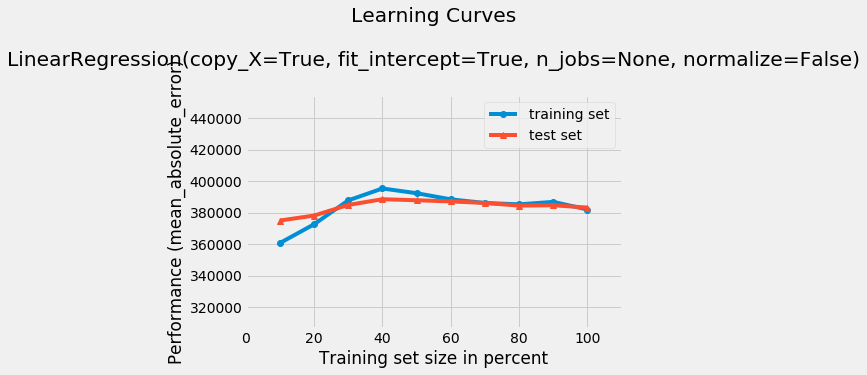

In [48]:
from mlxtend.plotting import plot_learning_curves

plot_learning_curves(trainx, trainy, validationx, validationy, lin_regressor, scoring='mean_absolute_error')

# 2.Decision Tree regression

In [49]:
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor(max_depth=8)
dt.fit(trainx, trainy)
y_pred_train_dt = dt.predict(trainx)
y_pred_validation_dt=dt.predict(validationx)
y_pred_test_dt=dt.predict(data1)

print('mape: ',np.mean(np.abs((trainy-y_pred_train_dt)/trainy)*100))
print('mape: ',np.mean(np.abs((validationy-y_pred_validation_dt)/validationy)*100))

mape:  38.89182257367877
mape:  41.917898632942915


([159023.9660986171,
  206937.98697483022,
  220092.15490544977,
  234897.64778696248,
  236907.80724004543,
  234498.4290755856,
  235554.91144853696,
  238301.7581523037,
  237076.33065719387,
  237701.2753640128],
 [344861.76510443346,
  312659.1904411273,
  291178.06063848437,
  291884.79030098766,
  287820.33918594074,
  283635.7442448701,
  281288.1965327067,
  275958.39863442135,
  270913.0462974873,
  272943.743101889])

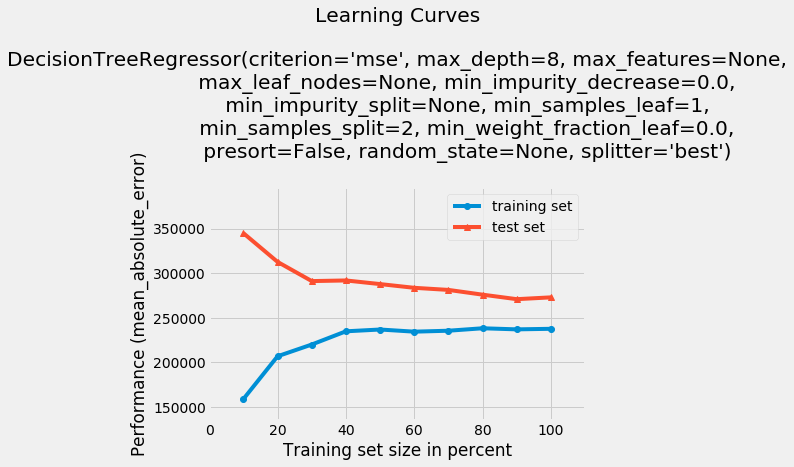

In [50]:
from mlxtend.plotting import plot_learning_curves

plot_learning_curves(trainx, trainy, validationx, validationy, dt, scoring='mean_absolute_error')

# 3.GradientBoostingRegressor

In [51]:
from sklearn.ensemble import GradientBoostingRegressor
gbm=GradientBoostingRegressor(max_depth=5,n_estimators=250)
gbm.fit(X=trainx, y=trainy)
y_pred_train_gbm = gbm.predict(trainx)
y_pred_validation_gbm=gbm.predict(validationx)
y_pred_test_gbm=gbm.predict(data1)

print('mape: ',np.mean(np.abs((trainy-y_pred_train_gbm)/trainy)*100))
print('mape: ',np.mean(np.abs((validationy-y_pred_validation_gbm)/validationy)*100))

mape:  31.476414073418034
mape:  38.197233545676724


([75991.32625620316,
  114621.09469709493,
  131252.1177669056,
  146714.10949890153,
  153715.70419527453,
  162544.4884293191,
  166273.72027950833,
  169053.58874360946,
  175744.8507756088,
  176173.10927678717],
 [266170.33693396393,
  258944.35557887956,
  257756.6622992367,
  261137.38347958817,
  256881.0319576565,
  252932.04967490476,
  254729.07090415212,
  249913.51161735077,
  249809.54732890835,
  245467.83862826982])

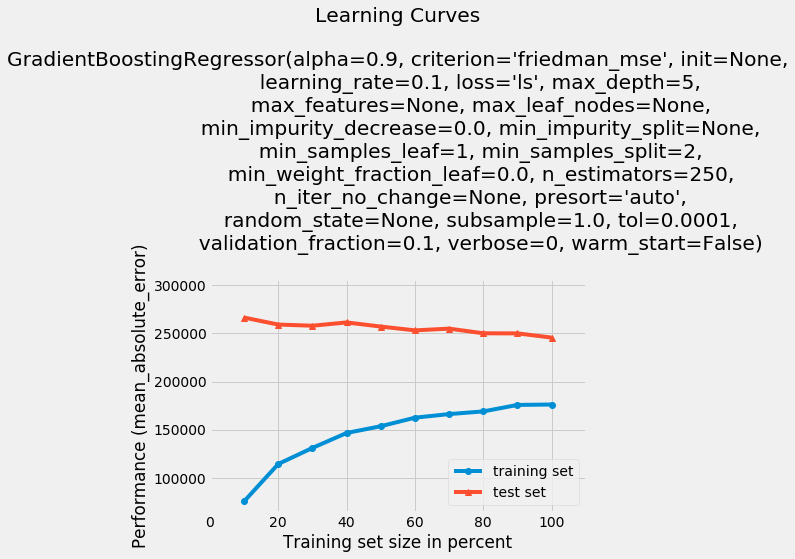

In [52]:
from mlxtend.plotting import plot_learning_curves

plot_learning_curves(trainx, trainy, validationx, validationy, gbm, scoring='mean_absolute_error')

# 4.RandomForestRegressor

In [53]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(max_depth=10,n_estimators=300)
rfr.fit(trainx,trainy)
y_pred_train_rfr = rfr.predict(trainx)
y_pred_validation_rfr=rfr.predict(validationx)
y_pred_test_rfr=rfr.predict(data1)

print('mape: ',np.mean(np.abs((trainy-y_pred_train_rfr)/trainy)*100))
print('mape: ',np.mean(np.abs((validationy-y_pred_validation_rfr)/validationy)*100))

mape:  34.390183230156566
mape:  39.20073969691322


([147858.88080741072,
  165964.29097476194,
  179885.3333510114,
  192670.26056794802,
  195960.62647331832,
  195121.0135016537,
  197431.32636913614,
  198141.30333800428,
  201269.59869251307,
  201218.3447845273],
 [273931.9875075564,
  266665.7449562981,
  261413.3937771091,
  260315.38505033628,
  256883.9588425025,
  253553.77936774067,
  252432.21599443033,
  251412.163312075,
  251287.4943776764,
  247671.8353560416])

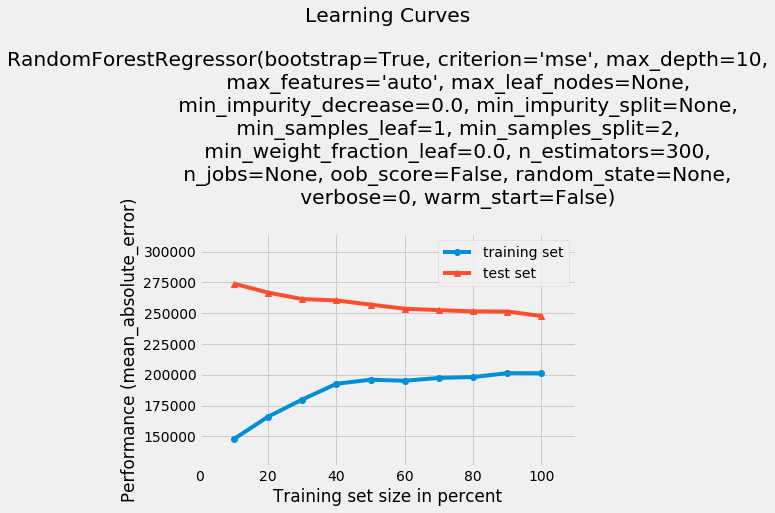

In [54]:
from mlxtend.plotting import plot_learning_curves

plot_learning_curves(trainx, trainy, validationx, validationy, rfr, scoring='mean_absolute_error')

In [55]:
y_pred_test_gbm

array([ 567912.41799365,  547012.44745307, 2065225.85860253, ...,
       3972606.9356853 , 3065826.07872255, 5900949.42907022])

In [56]:
df1={"PropertyID":data1_original["PropertyID"],"PropertyEvaluationvalue":y_pred_test_gbm}

In [57]:
submission=pd.DataFrame(df1,columns=["PropertyID","PropertyEvaluationvalue"])

In [58]:
submission.to_csv('submission_file_1.csv',index=False)

In [59]:
df2={"PropertyID":data1_original["PropertyID"],"PropertyEvaluationvalue":y_pred_train_rfr}
submission=pd.DataFrame(df1,columns=["PropertyID","PropertyEvaluationvalue"])
submission.to_csv('submission_file_2.csv',index=False)

In [60]:
df3={"PropertyID":data1_original["PropertyID"],"PropertyEvaluationvalue":y_pred_test_dt}
submission=pd.DataFrame(df1,columns=["PropertyID","PropertyEvaluationvalue"])
submission.to_csv('submission_file_3.csv',index=False)